In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [4]:
nifty_50 = pd.read_csv('National_Stock_Exchange_of_India_Ltd.csv', index_col="Symbol")
nifty_50.head()

,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
Symbol,,,,,,,,,,,,
ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


In [5]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, ADANIPORTS to WIPRO
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             50 non-null     object 
 1   High             50 non-null     object 
 2   Low              50 non-null     object 
 3   LTP              50 non-null     object 
 4   Chng             50 non-null     float64
 5   % Chng           50 non-null     float64
 6   Volume (lacs)    50 non-null     float64
 7   Turnover (crs.)  50 non-null     object 
 8   52w H            50 non-null     object 
 9   52w L            50 non-null     object 
 10  365 d % chng     50 non-null     float64
 11  30 d % chng      50 non-null     float64
dtypes: float64(5), object(7)
memory usage: 5.1+ KB


# **Datafame Metadata Changes**

In [6]:
nifty_50.rename(columns={"% Chng":"Percent_Change","Volume (lacs)":"Volume_In_Lacs","Turnover (crs.)":"Turnover_In_Crores","52w H":"52_Week_High","52w L":"52_Week_Low",
                      "365 d % chng":"365_Day_Percent_Change","30 d % chng":"30_Day_Percent_Change"},inplace=True)
cols = nifty_50.select_dtypes(exclude=['float']).columns
for col in cols:
    print(col)
    nifty_50[col]=nifty_50[col].str.replace(",","")

nifty_50[cols] = nifty_50[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

nifty_50.info()

#pandas.to_numeric() is one of the general functions in Pandas which is used to convert argument to a numeric type.
#Syntax: pandas.to_numeric(arg, errors=’raise’, downcast=None)
#Parameters:
#arg : list, tuple, 1-d array, or Series
#errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#-> If ‘raise’, then invalid parsing will raise an exception
#-> If ‘coerce’, then invalid parsing will be set as NaN
#-> If ‘ignore’, then invalid parsing will return the input
#downcast : [default None] If not None, and if the data has been successfully cast to a numerical dtype downcast that resulting data to the smallest numerical dtype possible according to the following rules:
#-> ‘integer’ or ‘signed’: smallest signed int dtype (min.: np.int8)
#-> ‘unsigned’: smallest unsigned int dtype (min.: np.uint8)
#-> ‘float’: smallest float dtype (min.: np.float32)

Open
High
Low
LTP
Turnover_In_Crores
52_Week_High
52_Week_Low
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, ADANIPORTS to WIPRO
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    50 non-null     float32
 1   High                    50 non-null     float32
 2   Low                     50 non-null     float32
 3   LTP                     50 non-null     float32
 4   Chng                    50 non-null     float64
 5   Percent_Change          50 non-null     float64
 6   Volume_In_Lacs          50 non-null     float64
 7   Turnover_In_Crores      50 non-null     float32
 8   52_Week_High            50 non-null     float32
 9   52_Week_Low             50 non-null     float32
 10  365_Day_Percent_Change  50 non-null     float64
 11  30_Day_Percent_Change   50 non-null     float64
dtypes: float32(7), float64(5)
memory usage: 3.7+ KB


In [7]:
nifty_50.describe()
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. 
# of a data frame or a series of numeric values.

,Open,High,Low,LTP,Chng,Percent_Change,Volume_In_Lacs,Turnover_In_Crores,52_Week_High,52_Week_Low,365_Day_Percent_Change,30_Day_Percent_Change
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2985.739014,3017.261230,2914.208008,2939.568848,-70.133000,-2.930200,71.266600,569.706787,3440.588135,2208.556885,41.203000,-5.996800
std,5024.412598,5057.739258,4911.416992,4943.921387,163.203678,2.677007,93.462062,492.383118,5813.044922,3962.990967,37.358646,6.322546
min,125.599998,125.599998,120.500000,121.150002,-770.500000,-7.480000,0.300000,76.940002,141.500000,77.050003,-16.020000,-22.080000
25%,673.000000,678.425018,662.112503,663.187500,-66.775000,-4.527500,13.472500,195.897499,777.824997,391.837494,9.375000,-9.665000
50%,1155.950012,1156.750000,1105.750000,1121.250000,-29.975000,-3.300000,30.750000,463.429993,1456.125000,819.774994,35.860000,-5.705000
75%,2760.262573,2789.424988,2668.537476,2690.450012,-7.812500,-1.932500,99.200000,744.502487,3388.000000,2272.599976,65.942500,-2.222500
max,26450.000000,26539.900391,25812.000000,25900.000000,158.400000,7.230000,517.880000,2430.360107,32048.000000,22531.000000,167.950000,6.360000


# **Turnover of all Nifty 50 stocks in Crores**

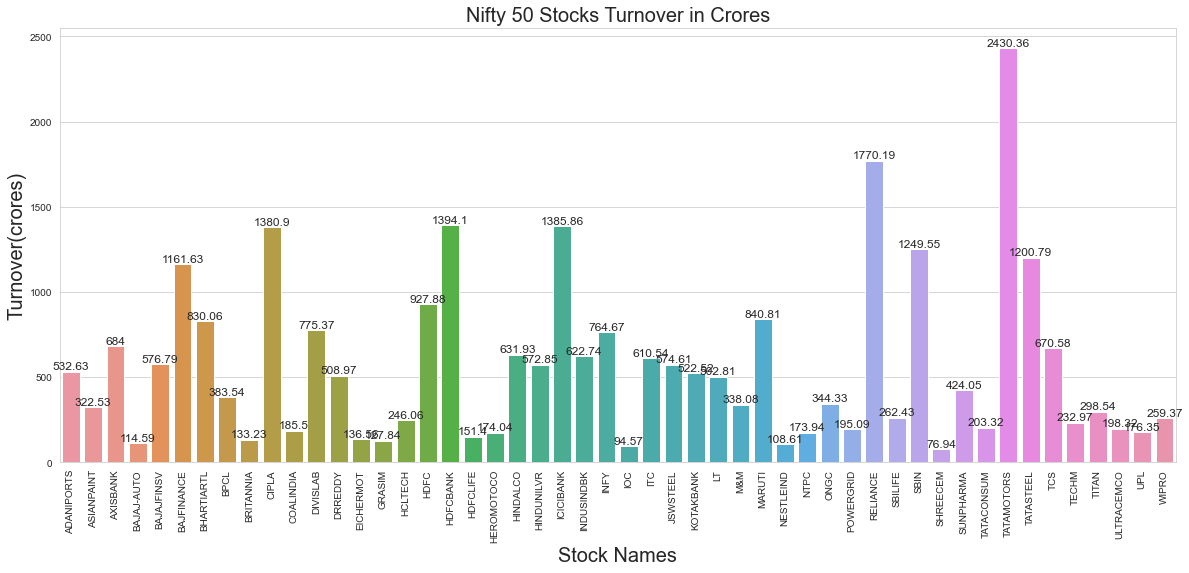

In [24]:
plt.figure(figsize=(20,8)) # it denote the size of graph.
plt.xticks(rotation=90)

sns.set_style("whitegrid")
# Whitegrid appears on the sides of the plot on setting it as set_style (‘whitegrid’). palette attribute is used to set the color of the bars. 

ax = sns.barplot(x=nifty_50.index,y=nifty_50["Turnover_In_Crores"])
#sns.barplot(x=nifty_50.index,y=nifty_50["Turnover_In_Crores"])
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title("Nifty 50 Stocks Turnover in Crores", size=20)
plt.xlabel("Stock Names", size=20)
plt.ylabel("Turnover(crores)", size=20)
plt.show()

**Average Turnover**

In [25]:
print("Average Turnover of Companies comrising Nifty 50 Index is {0:.2f}.".format(nifty_50.Turnover_In_Crores.mean()))

Average Turnover of Companies comrising Nifty 50 Index is 569.71.


# Volume Traded

Text(0, 0.5, 'Volume Traded(lacs)')

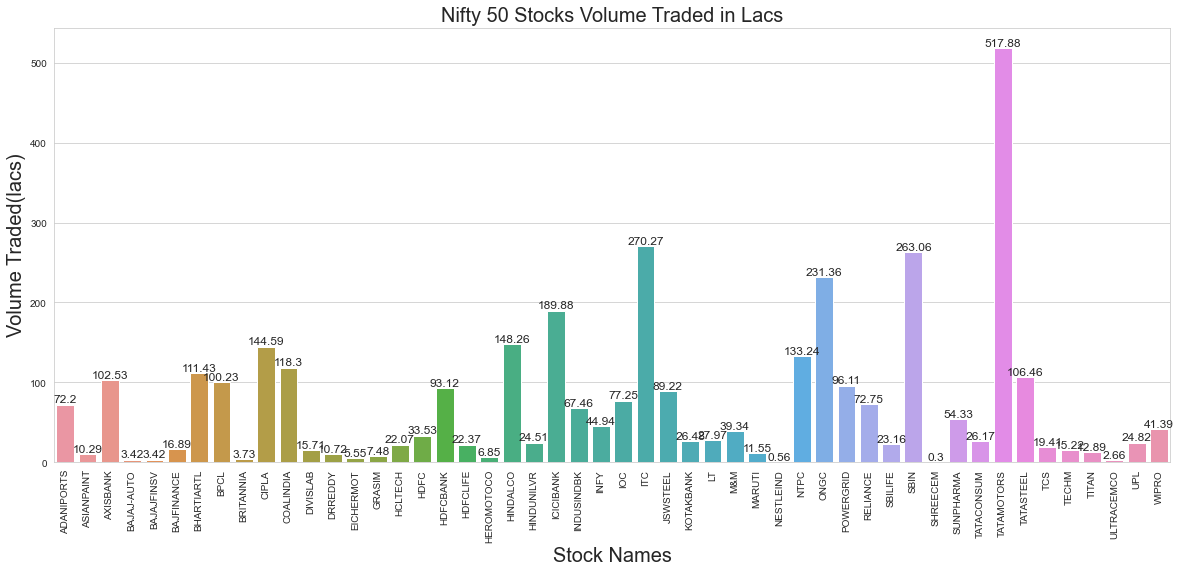

In [39]:
plt.figure(figsize=(20,8)) # it denote the size of graph.
plt.xticks(rotation=90)

sns.set_style("whitegrid")
# Whitegrid appears on the sides of the plot on setting it as set_style (‘whitegrid’). palette attribute is used to set the color of the bars.

ax = sns.barplot(x=nifty_50.index,y=nifty_50["Volume_In_Lacs"])
#sns.barplot(x=nifty_50.index,y=nifty_50["Volume_In_Lacs"])
ax.bar_label(ax.containers[0], fontsize = 12) # it denote the level of bars and the size of digits written on the bars.
plt.title("Nifty 50 Stocks Volume Traded in Lacs", size=20)
plt.xlabel("Stock Names", size=20)
plt.ylabel("Volume Traded(lacs)", size=20)

In [31]:
print ("Avg. Volume Traded {:.2f} Lacs".format(nifty_50.Volume_In_Lacs.mean()))

Avg. Volume Traded 71.27 Lacs


# **Check relatioship between Volume and Turnover**

Text(0, 0.5, 'Volume(Lacs)')

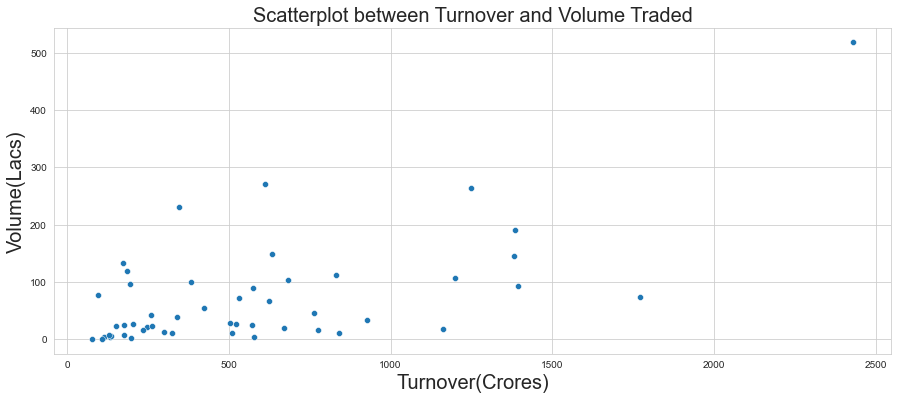

In [51]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=nifty_50.Turnover_In_Crores,y=nifty_50.Volume_In_Lacs)
plt.title("Scatterplot between Turnover and Volume Traded",fontsize=20)
plt.xlabel("Turnover(Crores)",fontsize=20)
plt.ylabel("Volume(Lacs)",fontsize=20)

Text(0, 0.5, 'Volume(Lacs)')

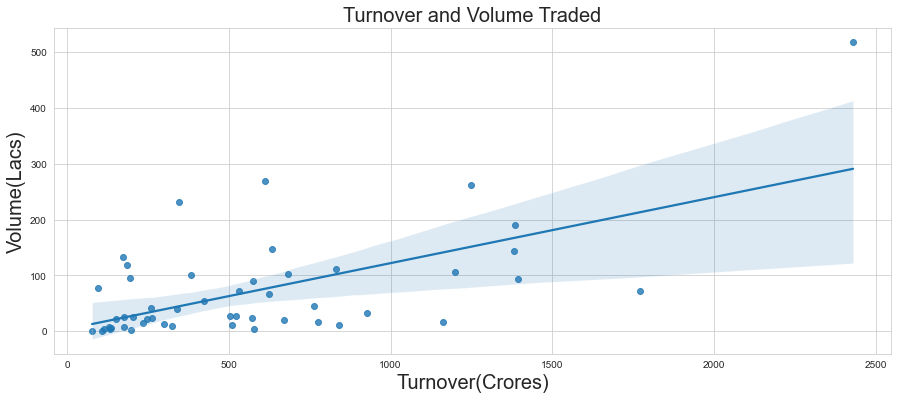

In [54]:
plt.figure(figsize=(15,6))
sns.regplot(x="Turnover_In_Crores",y="Volume_In_Lacs",data=nifty_50)
plt.title("Turnover and Volume Traded",fontsize=20)
plt.xlabel("Turnover(Crores)",fontsize=20)
plt.ylabel("Volume(Lacs)",fontsize=20)

***Clearly +ve correlation between Turnover and Volumes Traded***

# 365 day volatility analysis

Text(0, 0.5, '365 Days percent change')

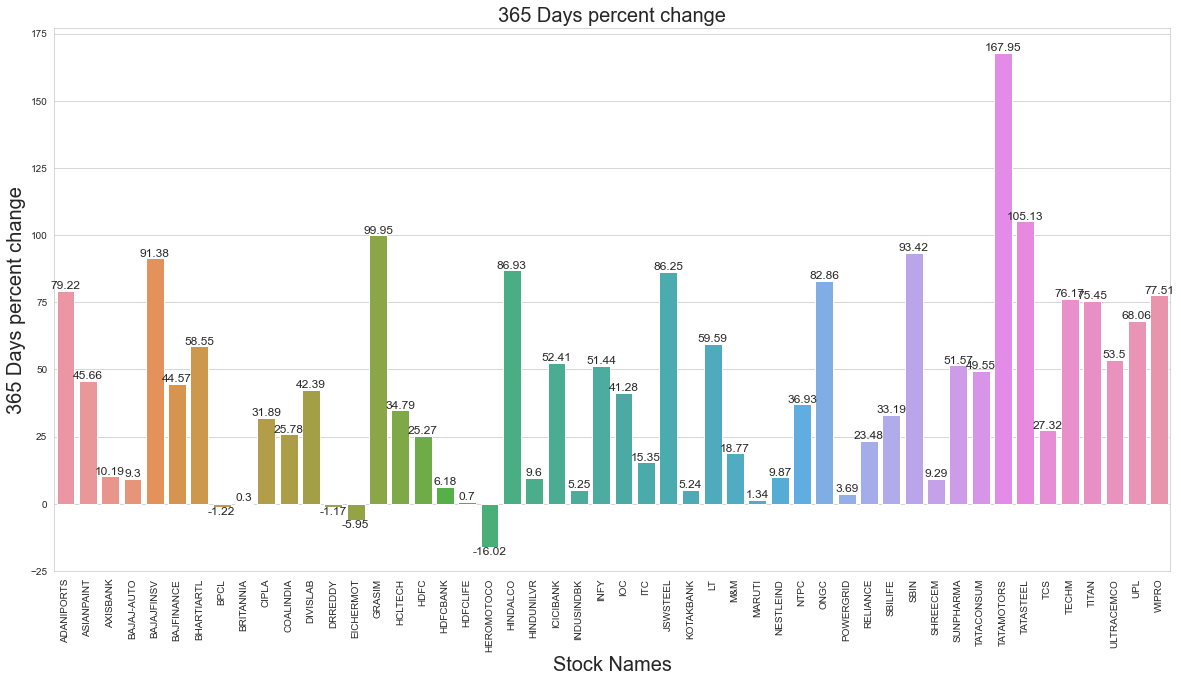

In [61]:
# Volatility is the speed of price changes of a stock. A stock with high volatility is one where the price changes
# rapidly over time, it will rise and fall at an accelerated rate. 
#nifty_50.columns
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax=sns.barplot(x=nifty_50.index,y=nifty_50["365_Day_Percent_Change"])
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title("365 Days percent change", fontsize=20)
plt.xlabel("Stock Names", fontsize=20)
plt.ylabel("365 Days percent change", fontsize=20)

Text(0, 0.5, '365 Days percent change')

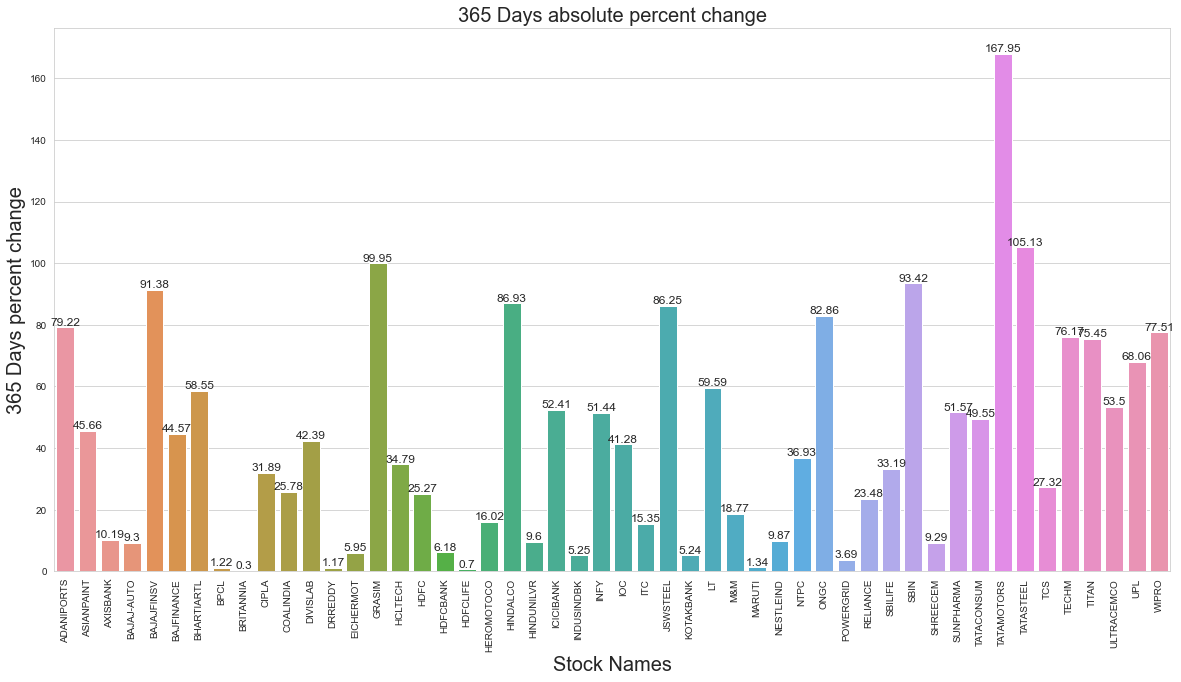

In [70]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax=sns.barplot(x=nifty_50.index,y=nifty_50["365_Day_Percent_Change"].abs())
ax.bar_label(ax.containers[0], fontsize = 12)
plt.title("365 Days absolute percent change", fontsize=20)
plt.xlabel("Stock Names", fontsize=20)
plt.ylabel("365 Days percent change", fontsize=20)

In [71]:
#nifty_50.columns
nifty_50["Avg_Price_52_Week"]= (nifty_50["52_Week_High"]+nifty_50["52_Week_Low"])/2
nifty_50["Standard_Deviation"] = np.sqrt(((nifty_50["52_Week_High"]-nifty_50["Avg_Price_52_Week"])**2 + (nifty_50["52_Week_Low"]-nifty_50["Avg_Price_52_Week"])**2)/2)

Text(0, 0.5, 'Standard Deviation(Rupees)')

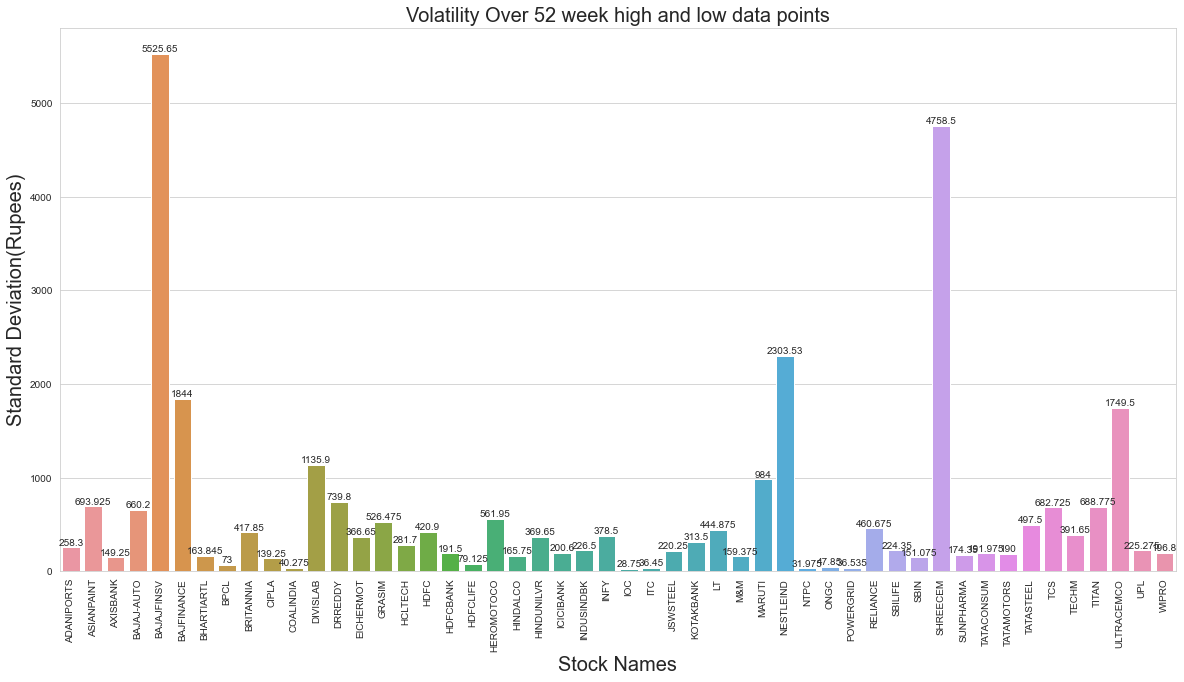

In [77]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax=sns.barplot(x=nifty_50.index,y=nifty_50["Standard_Deviation"])
ax.bar_label(ax.containers[0], fontsize = 10)
plt.title("Volatility Over 52 week high and low data points", fontsize=20)
plt.xlabel("Stock Names", fontsize=20)
plt.ylabel("Standard Deviation(Rupees)", fontsize=20)

***BAJAJFINSV, SHREECEM, NESTLEIND and BAJFINANCE have highest volatility in price over 52 weeks.***

# Check Relationship between Volatility and Turnover

Text(0, 0.5, 'Standard Deviation of Nifty 50 stocks')

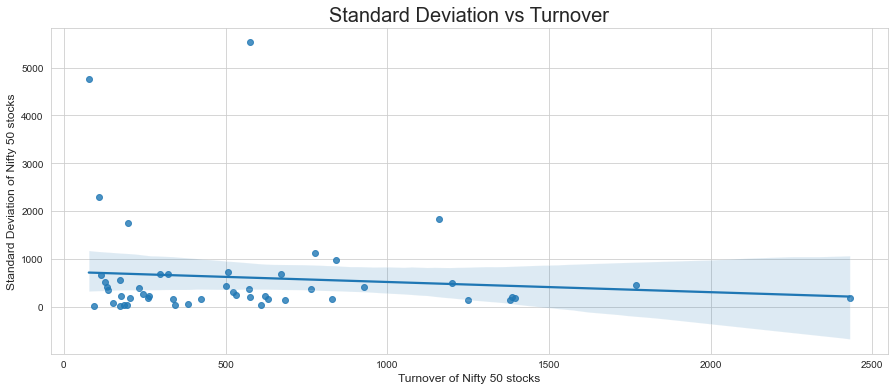

In [79]:
plt.figure(figsize=(15,6))
sns.regplot(x=nifty_50["Turnover_In_Crores"],y=nifty_50["Standard_Deviation"])
plt.title("Standard Deviation vs Turnover",fontsize=20)
plt.xlabel("Turnover of Nifty 50 stocks",fontsize=12)
plt.ylabel("Standard Deviation of Nifty 50 stocks",fontsize=12)

***Standard Deviation is not affected by turn over.***

plt.figure(figsize=(15,6))
sns.regplot(x=nifty_50["Volume_In_Lacs"],y=nifty_50["Standard_Deviation"])
plt.title("Standard Deviation vs Volume Traded",fontsize=15)
plt.xlabel("Volume Traded of Nifty 50 stocks")
plt.ylabel("Standard Deviation of Nifty 50 stocks")

***Slightly -ve correlation with volume Traded***

# **Correlation Matrix**

Text(0.5, 1.0, 'Heatmap of Attributes to check the correlation')

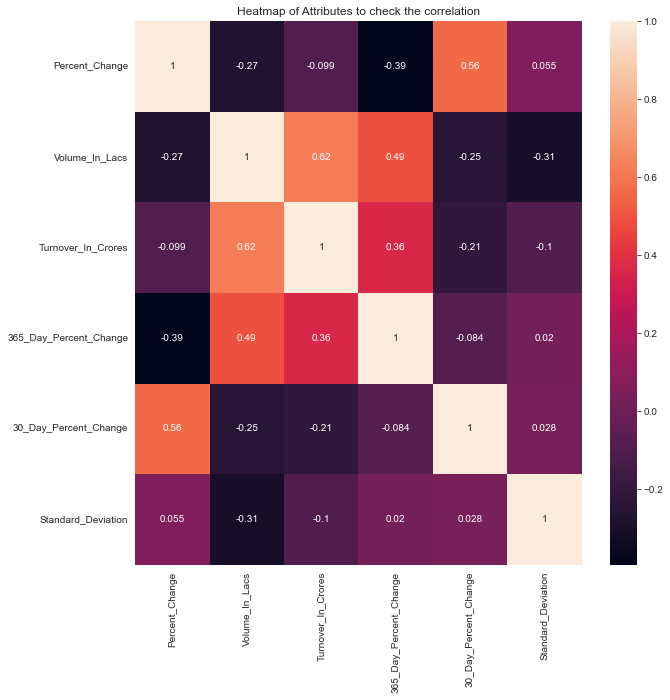

In [96]:
nifty_50_related=nifty_50.iloc[:,5:]
nifty_50_related=nifty_50_related.drop(["52_Week_High","52_Week_Low","Avg_Price_52_Week"],axis=1)
nifty_50_corr=nifty_50_related.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(nifty_50_corr,annot=True)
plt.title("Heatmap of Attributes to check the correlation")

***Current Percent Change has positive correlation with 30 day percent change whereas negative correlation beween 365 percentage change. That means 365 percent change does not drive the actual price but near term change affects the price.***
